# UNIVARIATE LINEAR REGRESSION 

In [1]:
import numpy as np

In [2]:
import pandas as pd
data = pd.read_csv("data.csv", delimiter = "," , names = ["X","Y"])

In [3]:
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
data.columns

Index(['X', 'Y'], dtype='object')

In [5]:
X = data['X']
Y = data['Y']

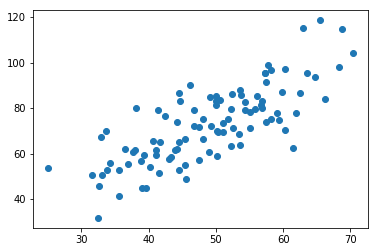

In [25]:
import matplotlib.pyplot as plt 
plt.scatter(X,Y)
plt.show()

# Coding from scratch

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, random_state = 0, test_size= 0.25)

In [9]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((75,), (25,), (75,), (25,))

In [10]:
def fit(X_train, Y_train):
    m = ((X_train*Y_train).mean() - (X_train.mean() * Y_train.mean()))/((X_train**2).mean() - (X_train.mean()**2))
    c = Y_train.mean() - m * X_train.mean()
    return m,c

In [11]:
def predict(X_test, m, c):
    return m*X_test +c

In [12]:
def score(Y_true, Y_pred):
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - Y_true.mean())**2).sum()
    return 1 - u/v

In [13]:
def avg_cost(Y_true, Y_pred):
    return (((Y_true - Y_pred)**2).mean())

In [14]:
m, c = fit(X_train, Y_train)

In [15]:
m, c

(1.338103722024702, 7.221214607192081)

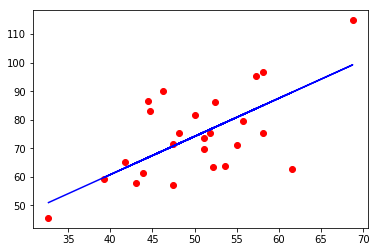

In [16]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, m*X_test + c, color = 'blue')
plt.show()

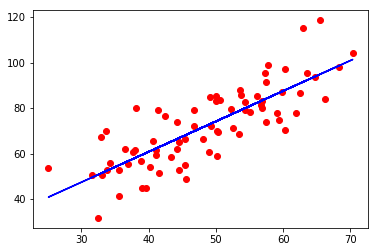

In [17]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, m*X_train + c, color = 'blue')
plt.show()

In [18]:
Y_pred = predict(X_test, m, c)

In [19]:
score = score(Y_test, Y_pred)
print("the score using our own linear regression code is {}".format(score))

the score using our own linear regression code is 0.3845317632341688


In [20]:
cost = avg_cost(Y_test, Y_pred)
cost

137.1465757998132

# Using sklearn linear regression

In [21]:
from sklearn.linear_model import LinearRegression

alg = LinearRegression()

X_train_changed = X_train.values.reshape(-1,1)
X_test_changed = X_test.values.reshape(-1,1)
alg.fit(X_train_changed, Y_train)

m = alg.coef_
c = alg.intercept_

print(m[0],c)

1.3381037220246799 7.221214607193161


In [22]:
Y_pred = alg.predict(X_test_changed)
score = alg.score(X_test_changed, Y_test)

print("the score using inbuilt sklearn linear regression model is : ", score)

the score using inbuilt sklearn linear regression model is :  0.38453176323417015


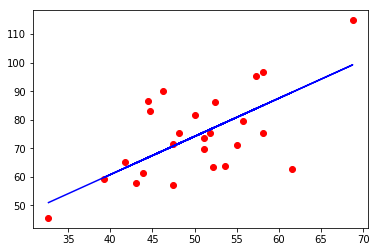

In [23]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, Y_pred, color = 'blue')
plt.show()

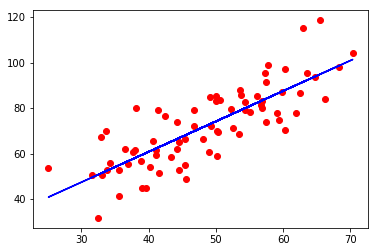

In [24]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, m*X_train + c, color = 'blue')
plt.show()